## Challenge 7- Classification

In [2]:
import pandas as pd
import numpy as np
#import matplotlib as plt
#import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit

%matplotlib inline

Open dataframe on house votes and rename columns

In [2]:
columns = ["v1","v2","v3","v4","v5",
           "v6","v7","v8","v9","v10","v11",
           "v12","v13","v14","v15","v16","party"]

df = pd.read_csv('house-votes-84.csv', names=columns)

Replace "y" with 1 and "no" with 0. Replace "?" values with NaN

In [3]:
df.replace("y", 1, inplace = True)
df.replace("n", 0, inplace = True)
df.replace("?", np.nan, inplace = True)

Fill NaN values with average of column

In [4]:
df.fillna(df.mean(), inplace=True)

df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,party
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,republican.
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,republican.
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,democrat.
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,democrat.
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,democrat.


In [5]:
#remove period from end of party name
df['party'] = df['party'].str.rstrip('.')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
v1       435 non-null float64
v2       435 non-null float64
v3       435 non-null float64
v4       435 non-null float64
v5       435 non-null float64
v6       435 non-null float64
v7       435 non-null float64
v8       435 non-null float64
v9       435 non-null float64
v10      435 non-null float64
v11      435 non-null float64
v12      435 non-null float64
v13      435 non-null float64
v14      435 non-null float64
v15      435 non-null float64
v16      435 non-null float64
party    435 non-null object
dtypes: float64(16), object(1)
memory usage: 57.8+ KB


Split the data into a test and training set. 

In [7]:
X = df.drop("party", axis=1)
y = df.party

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

Use KNN algorithm to train model that predicts political party as Democrat or Republican

In [8]:
#create loop to find best value for KNN
accuracy_list = []

def KNN(X_train, y_train, y_test, X_test):
    """function takes train/test split and returns list of k values 
    with the accuracy of prediction"""
    for n in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=n)
        neigh.fit(X_train, y_train) 

        predict = neigh.predict(X_test)
    
        #calculate the accuracy of the prediction
        accuracy = accuracy_score(y_test, predict)
        accuracy_list.append((n,accuracy))
    return accuracy_list

Find the k value with the best accuracy

In [9]:
sorted(KNN(X_train, y_train, y_test, X_test), key = lambda x: x[1], reverse = True)

[(6, 0.93129770992366412),
 (9, 0.93129770992366412),
 (10, 0.93129770992366412),
 (8, 0.92366412213740456),
 (11, 0.92366412213740456),
 (12, 0.92366412213740456),
 (13, 0.92366412213740456),
 (14, 0.92366412213740456),
 (15, 0.92366412213740456),
 (16, 0.92366412213740456),
 (17, 0.92366412213740456),
 (5, 0.91603053435114501),
 (7, 0.91603053435114501),
 (18, 0.91603053435114501),
 (19, 0.91603053435114501),
 (20, 0.91603053435114501),
 (1, 0.9007633587786259),
 (3, 0.9007633587786259),
 (4, 0.9007633587786259),
 (2, 0.89312977099236646)]

Use logistic regression to create similar model

In [10]:
model = LogisticRegression()
model.fit(X, y)
predict =  model.predict(X)

In [11]:
y_pred = predict
y_true = df.party
log_reg_accuracy = accuracy_score(y_true, y_pred)

Make a bar graph of democrats and republicans.

In [12]:
party_group = df.groupby("party")["v1"].count()

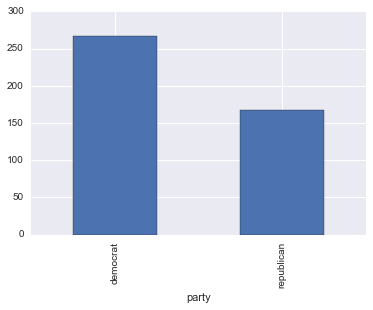

In [13]:
party_group.plot.bar()

Make a very simple predictor that predicts 'democrat' or "republican" for every incoming example.

In [24]:
XD = np.matrix(df.drop("party", axis=1))
yD = ['democrat'] * len(XD)
y = df.party
log_reg_accuracy_d = accuracy_score(y, yD)
print log_reg_accuracy_d

0.613793103448


In [23]:
XR = np.matrix(df.drop("party", axis=1))
yR = ['republican'] * len(XD)
y = df.party
y_pred = yR
y_true = y
log_reg_accuracy_r = accuracy_score(y, yR)
print log_reg_accuracy_r

0.386206896552


Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

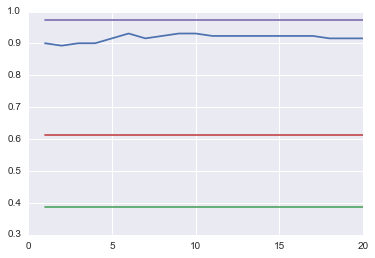

In [37]:
x, y_knn = zip(*accuracy_list)
#log_reg_accuracy_r_list = []
#log_reg_accuracy_d_list = []
log_reg_accuracy_r_list = [log_reg_accuracy_r]*len(x)
log_reg_accuracy_d_list = [log_reg_accuracy_d]*len(x)
log_reg_accuracy_list = [log_reg_accuracy]*len(x)


plt.plot(x,y_knn)

plt.plot(x,log_reg_accuracy_r_list)
plt.plot(x, log_reg_accuracy_d_list)
plt.plot(x, log_reg_accuracy_list)



Plot of learning curve for logistic regression

In [40]:
X = df.drop("party", axis=1)
y = df.party

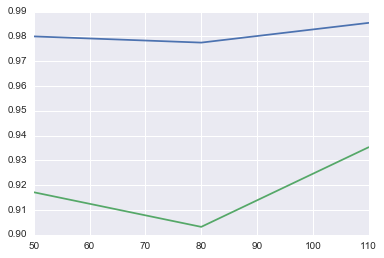

In [61]:
train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)

train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)


plt.plot(train_sizes, train_cv_err)
plt.plot(train_sizes, test_cv_err)





Plot of learning curve for logistic regression

Example of cross validation for logistic regression using cross_val_score from sklearn

In [70]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print np.mean(scores)

0.958536852081


### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [101]:
columns = ["v1","v2","v3","v4","v5",
           "v6","v7","v8","v9","v10","v11",
           "v12","v13","v14","v15","v16","party"]

df = df = pd.read_csv('house-votes-84.csv', names=columns)

In [102]:
df.replace("y", 1, inplace = True)
df.replace("n", 0, inplace = True)
df.replace("?", np.nan, inplace = True)

In [103]:
#remove period from end of party name
df['party'] = df['party'].str.rstrip('.')

In [111]:
df.fillna(df.mode().iloc[0], inplace=True)
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,republican
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,republican
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,democrat
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,democrat
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,democrat


In [105]:
X = df.drop(["party", "v1"], axis=1)
y = df.v1

In [106]:
predict = df.iloc[[1]]

In [110]:
model = KNeighborsClassifier()
train_cvs = cross_val_score(clf, X, y, cv=5)
np.mean(train_cvs)

0.66417341012369069

### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [154]:
df = pd.read_csv('2013_movies.csv')

In [155]:
rating_group = df.groupby("Rating")["Title"].count()

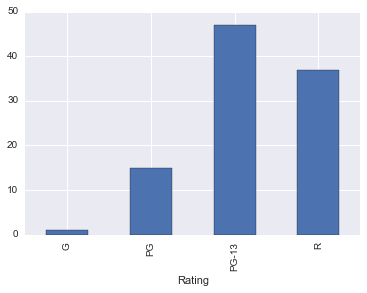

In [156]:
#plot counts of movies per MPAA rating category
rating_group.plot.bar()

In [157]:
df[['Budget', 'DomesticTotalGross',"Runtime"]] = df[['Budget', 'DomesticTotalGross',"Runtime"]].fillna(df.mean(), inplace=True)

#df.fillna(df.mean(), inplace=True)

In [158]:
X = df.drop(["Rating", "ReleaseDate","Director","Title"], axis=1)
y = df.Rating

Logistic Regression to predict MPAA rating

In [159]:
model = LogisticRegression()
model.fit(X, y)
predict =  model.predict(X)

In [160]:
#print accuracy of logist regression predictions 
y_pred = predict
y_true = df.Rating
log_reg_accuracy = accuracy_score(y_true, y_pred)
print log_reg_accuracy

0.5


K Nearest Neighbor to predict MPAA rating- find best K

In [171]:
X = df.drop(["Rating", "ReleaseDate","Director","Title"], axis=1)
y = df.Rating

accuracy_list = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [172]:
#K= 1, ~0.59 accuracy
sorted(KNN(X_train, y_train, y_test, X_test), key = lambda x: x[1], reverse = True)

[(1, 0.59999999999999998),
 (3, 0.59999999999999998),
 (5, 0.56666666666666665),
 (9, 0.56666666666666665),
 (6, 0.53333333333333333),
 (7, 0.53333333333333333),
 (8, 0.53333333333333333),
 (14, 0.53333333333333333),
 (2, 0.5),
 (4, 0.5),
 (11, 0.5),
 (12, 0.5),
 (13, 0.5),
 (16, 0.5),
 (17, 0.5),
 (18, 0.5),
 (19, 0.5),
 (20, 0.5),
 (10, 0.46666666666666667),
 (15, 0.43333333333333335)]

Baseline predictor that guess "PG" everytime ~ 15% accuracy

In [168]:
XPG = np.matrix(df.drop(["Rating", "ReleaseDate","Director","Title"], axis=1))

yPG = ['PG'] * len(XPG)
y = df.Rating
log_reg_accuracy_pg = accuracy_score(y, yPG)
print log_reg_accuracy_pg

0.15


### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [176]:
columns = ["age", "year", "nodes", "survival"]
df = pd.read_csv('haberman.csv', names=columns)
